In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../Resources/Data_Cleaned/master_dataset")

In [13]:
df = df.drop(['min 1a1c', 'min 1a2c','min 1a3c', 'min 2a1w0c', 'min 2a1w1c', 'min 2a1w2c', 'min 2a1w3c','min 2a2w0c', 'min 2a2w1c', 'min 2a2w2c', 'min 2a2w3c'],axis=1)

In [14]:
lw_columns = ['pov 1a0c', 'pov 1a1c', 'pov 1a2c','pov 1a3c', 'pov 2a1w0c', 'pov 2a1w1c', 'pov 2a1w2c', 'pov 2a1w3c', 'pov 2a2w0c', 'pov 2a2w1c', 'pov 2a2w2c', 'pov 2a2w3c', 'live 1a0c', 'live 1a1c', 'live 1a2c', 'live 1a3c', 'live 2a1w0c','live 2a2w0c','live 2a2w1c', 'live 2a1w1c','live 2a1w3c', 'live 2a1w2c', 'live 2a2w2c', 'live 2a2w3c', 'min 1a0c']

In [15]:
df = df.dropna(how="any")

In [16]:
#remove all of the dollar signs from the dataframe
for i in lw_columns:
    df[i] = df[i].str.replace('$','')

C:\Users\steve\AppData\Local\Temp/ipykernel_6344/1799059137.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i] = df[i].str.replace('$','')


In [17]:
for i in lw_columns:
    df[i] = (((df['median_household_income_2019']/2040).astype(float) / df[i].astype(float)) -1) * 100

In [18]:
X = df.drop(['County',"State", "FIPS", "crime_per_10k"], axis=1)
# X = df["median_household_income_2019"]
y = df['crime_per_10k']


In [19]:
#get types of each column
df.dtypes

County                           object
State                            object
FIPS                              int64
pov 1a0c                        float64
pov 1a1c                        float64
pov 1a2c                        float64
pov 1a3c                        float64
pov 2a1w0c                      float64
pov 2a1w1c                      float64
pov 2a1w2c                      float64
pov 2a1w3c                      float64
pov 2a2w0c                      float64
pov 2a2w1c                      float64
pov 2a2w2c                      float64
pov 2a2w3c                      float64
live 1a0c                       float64
live 1a1c                       float64
live 1a2c                       float64
live 1a3c                       float64
live 2a1w0c                     float64
live 2a1w1c                     float64
live 2a1w2c                     float64
live 2a1w3c                     float64
live 2a2w0c                     float64
live 2a2w1c                     float64


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [22]:
def test_model(model):
    reg = model.fit(X_train, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    print()
    plt.scatter(y_test, model.predict(X_test))
    plt.show()


Model: LinearRegression
Train score: 0.059291541839259554
Test Score: 0.029822447128686647




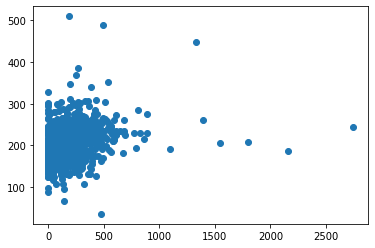

Model: KNeighborsRegressor
Train score: 0.2852434764537527


C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Test Score: -0.10830825573552993




C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


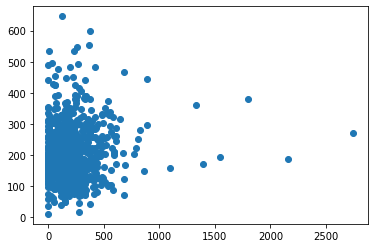

Model: RandomForestRegressor
Train score: 0.8826580618278661
Test Score: 0.12531981599379582




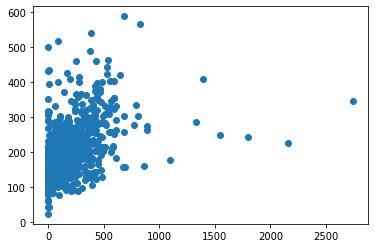

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.15025106698166846




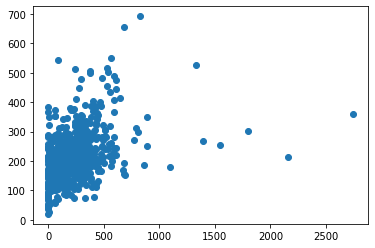

Model: AdaBoostRegressor
Train score: 0.0072098237720120695
Test Score: -0.03311438992862126




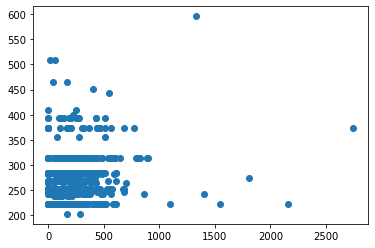

In [23]:
test_model(LinearRegression())
test_model(KNeighborsRegressor())
test_model(RandomForestRegressor())
test_model(ExtraTreesRegressor())
test_model(AdaBoostRegressor())

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=X_train_scale.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 160       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [26]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [27]:
fit_model = nn_model.fit(X_train_scale, y_train, epochs=50)

Epoch 1/50
89/89 [==============================] - 0s 527us/step - loss: 7.0543 - accuracy: 0.0315
Epoch 2/50
89/89 [==============================] - 0s 657us/step - loss: -26.6042 - accuracy: 0.0011
Epoch 3/50
89/89 [==============================] - 0s 544us/step - loss: -109.6739 - accuracy: 0.0000e+00
Epoch 4/50
89/89 [==============================] - 0s 691us/step - loss: -603.1679 - accuracy: 0.0000e+00
Epoch 5/50
89/89 [==============================] - 0s 1ms/step - loss: -1981.5438 - accuracy: 0.0000e+00
Epoch 6/50
89/89 [==============================] - 0s 730us/step - loss: -4434.2144 - accuracy: 0.0000e+00
Epoch 7/50
89/89 [==============================] - 0s 759us/step - loss: -8109.0557 - accuracy: 0.0000e+00
Epoch 8/50
89/89 [==============================] - 0s 555us/step - loss: -13054.5762 - accuracy: 0.0000e+00
Epoch 9/50
89/89 [==============================] - 0s 567us/step - loss: -19397.5156 - accuracy: 0.0000e+00
Epoch 10/50
89/89 [=========================

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scale,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - loss: -2.7079e+06 - accuracy: 0.0000e+00
Loss: -2707914.75, Accuracy: 0.0
